 # 1. questions to ask when you get any data set

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('train.csv')

##### how big is the data ?

In [3]:
df.shape

(891, 12)

##### how does the data look like ? 

In [4]:
# sample is better then head
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


##### what is the data type of columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### are there any missing values ?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### how does the data look mathametically ?

In [7]:
# this will useful for only numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### are there any duplicate values (rows) ? 

In [8]:
df.duplicated().sum()

0

##### is there any correlation between columns ? 

In [9]:
# if it is +Ve then it is proprational and when it is -ve then it is inversely proprational 
df.corr()

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/4096814582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
# correlation between survived with other col
# if it is +Ve then it is proprational and when it is -ve then it is inversely proprational 
# the bigger the -ve/+ve number the grater the chances of inversly proprational/proprational
df.corr()['Survived']

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/649034475.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# 2. EDA using Univariate analysis

In [11]:
import seaborn as sns

### 1.Categorial data

### a. countplot

<Axes: xlabel='Survived', ylabel='count'>

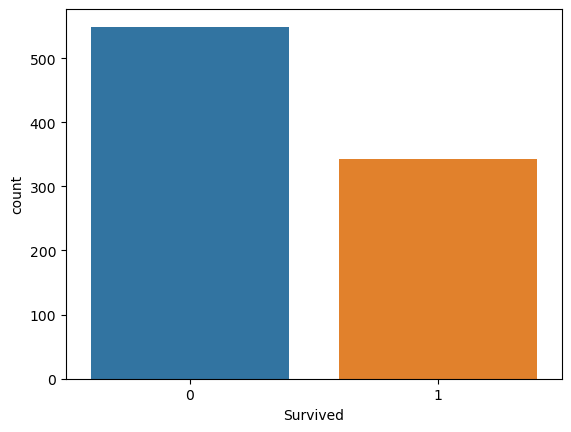

In [12]:
 sns.countplot(x=df['Survived'])

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

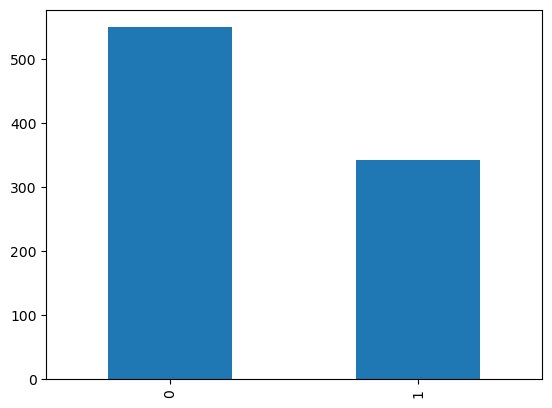

In [14]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: >

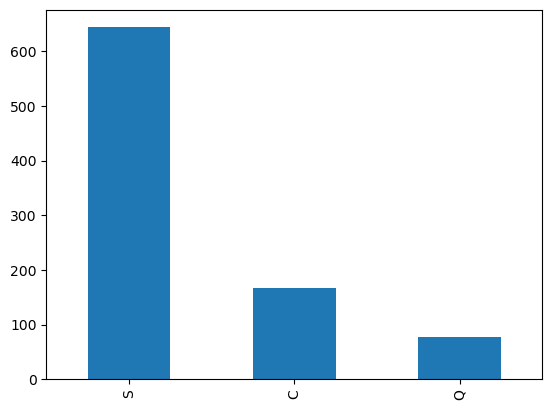

In [15]:
df['Embarked'].value_counts().plot(kind= 'bar')

### b. PieChart

<Axes: ylabel='Survived'>

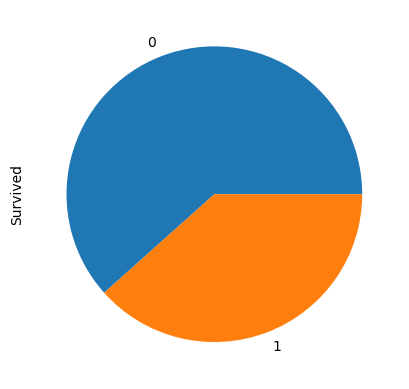

In [16]:
df['Survived'].value_counts().plot(kind= 'pie')

<Axes: ylabel='Embarked'>

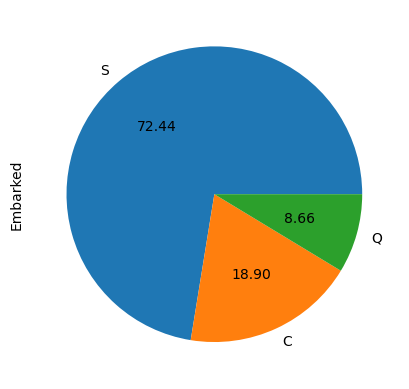

In [17]:
# for percentage 
df['Embarked'].value_counts().plot(kind= 'pie', autopct='%.2F')

## 3. Numerical data 

### a. Histogram

In [18]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

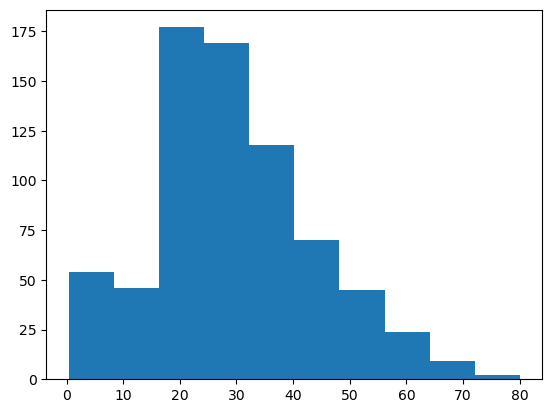

In [19]:
plt.hist(df['Age'])

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

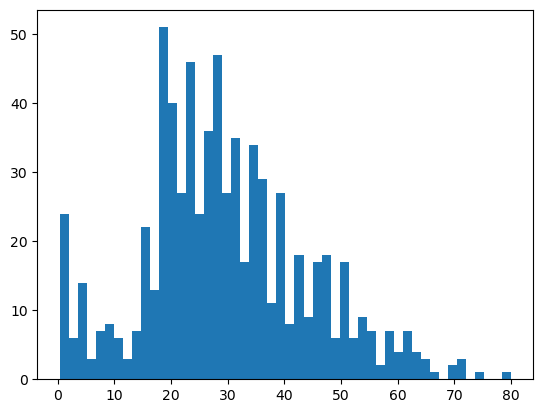

In [20]:
# to get the histogram specifically
plt.hist(df['Age'], bins=50)

### b. Distplot

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/2044210765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

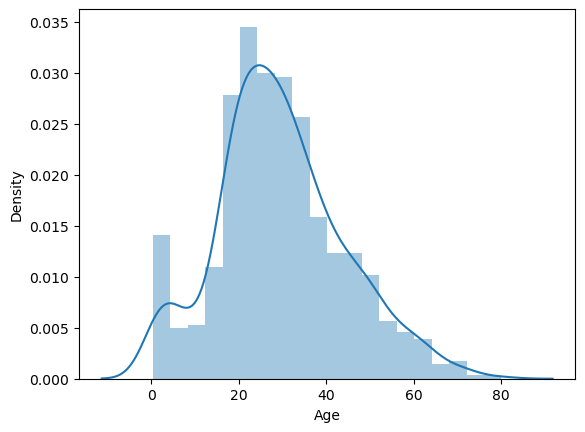

In [21]:
# it describes the probability
sns.distplot(df['Age'])

### c. Boxplot 
##### we use this when we have outliers

##### Interquartile range
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png" alt="interquartile range" width="600"/>

<Axes: >

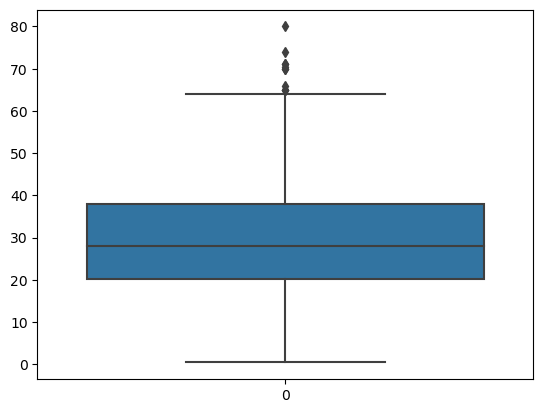

In [22]:
sns.boxplot(df['Age'])

In [23]:
df['Age'].max()

80.0

In [24]:
df['Age'].min()

0.42

In [25]:
df['Age'].mean()

29.69911764705882

In [26]:
# if this is 0 => perfect symmetrical
# if this is +ve => +ve skew towords right side 
# if this is -ve => -ve skew towords left side 
df['Age'].skew()

0.38910778230082704

# 3. EDA using Bivariate and multivarate 

In [27]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')
titanic = pd.read_csv('train.csv')

In [28]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
220,12.16,2.20,Male,Yes,Fri,Lunch,2
152,17.26,2.74,Male,No,Sun,Dinner,3
158,13.39,2.61,Female,No,Sun,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4
206,26.59,3.41,Male,Yes,Sat,Dinner,3


#### a. Scatterplot (Numerical - Numerical) 

<Axes: xlabel='total_bill', ylabel='tip'>

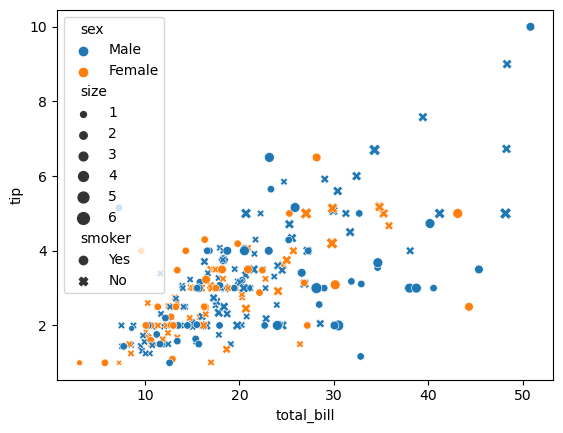

In [29]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])

### b. Bar Plot (Numerical - Categorical)

In [30]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


<Axes: xlabel='Pclass', ylabel='Survived'>

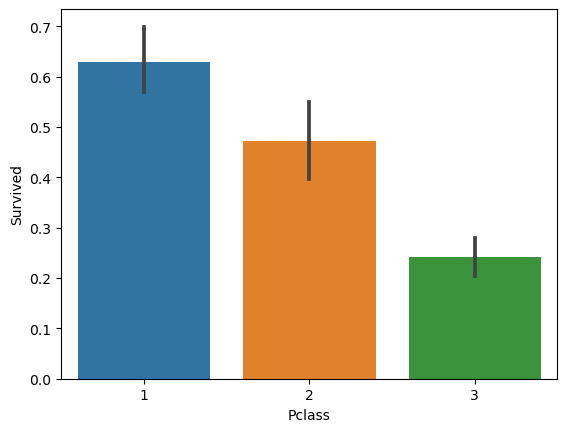

In [31]:
sns.barplot(x=titanic['Pclass'], y=titanic['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

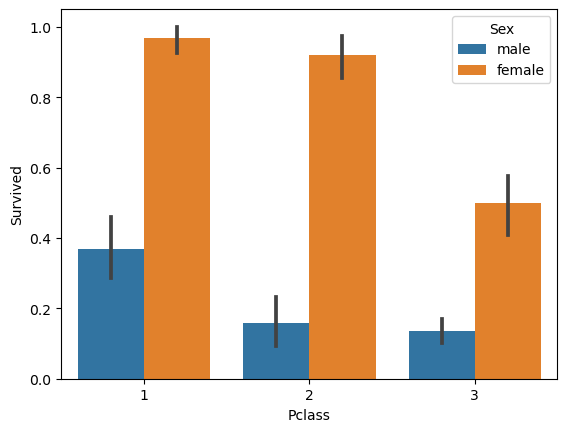

In [32]:
sns.barplot(x=titanic['Pclass'], y=titanic['Survived'], hue=titanic['Sex'])

<Axes: xlabel='Pclass', ylabel='Age'>

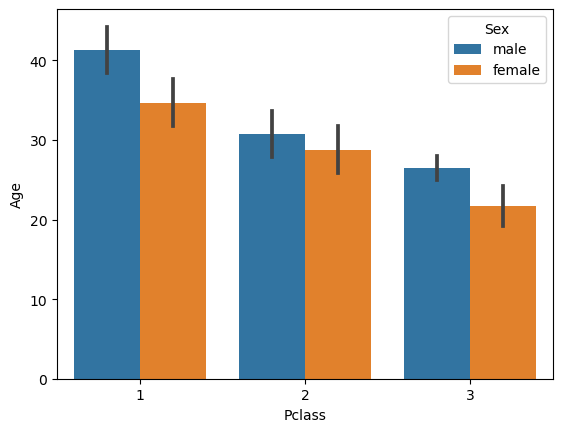

In [33]:
sns.barplot(x=titanic['Pclass'], y=titanic['Age'], hue=titanic['Sex'])

### c. Box Plot (Numerical - Categorical)

<Axes: xlabel='Age', ylabel='Sex'>

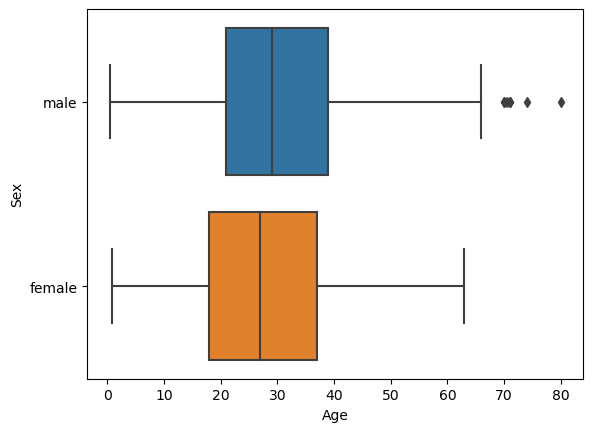

In [63]:
# sex wrt age ----- dots are outliers 
sns.boxplot(x=titanic['Age'], y=titanic['Sex'])

<Axes: xlabel='Age', ylabel='Sex'>

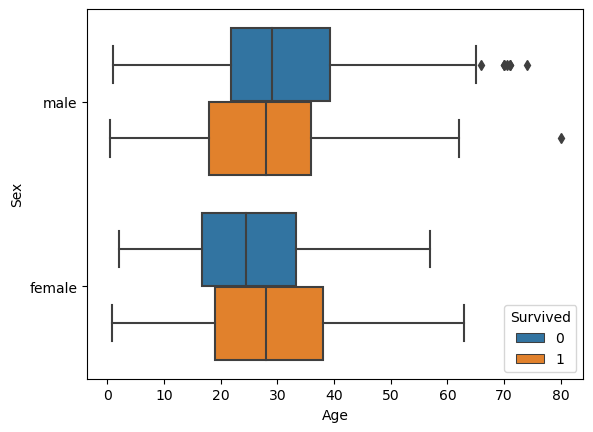

In [35]:
sns.boxplot(x=titanic['Age'], y=titanic['Sex'], hue=titanic['Survived'])

### d. Distplot (Numerical - Categorial)

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3727604973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']== 0]['Age'])
/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3727604973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

<Axes: xlabel='Age', ylabel='Density'>

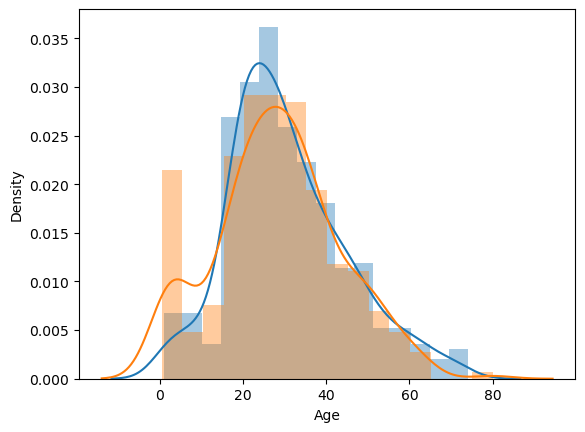

In [44]:
# curve with histogram of survived and died people with respect to age 
sns.distplot(titanic[titanic['Survived']== 0]['Age'])
sns.distplot(titanic[titanic['Survived']== 1]['Age'])

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3653706644.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']== 0]['Age'], hist=False)
/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3653706644.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

<Axes: xlabel='Age', ylabel='Density'>

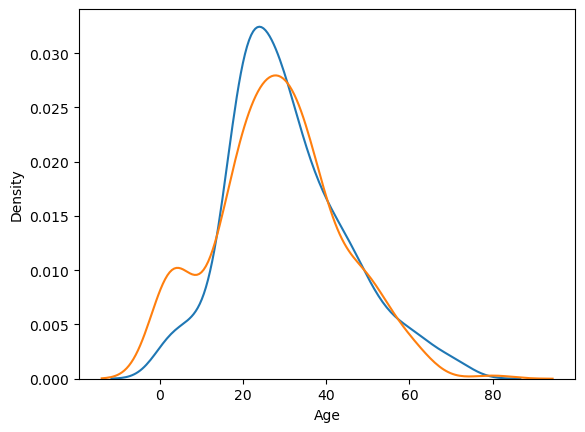

In [45]:
#without histogram 
sns.distplot(titanic[titanic['Survived']== 0]['Age'], hist=False)
sns.distplot(titanic[titanic['Survived']== 1]['Age'], hist=False )

### e. HeatMap (Categorial - Categorial)

In [48]:
# number of person survived on different class
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

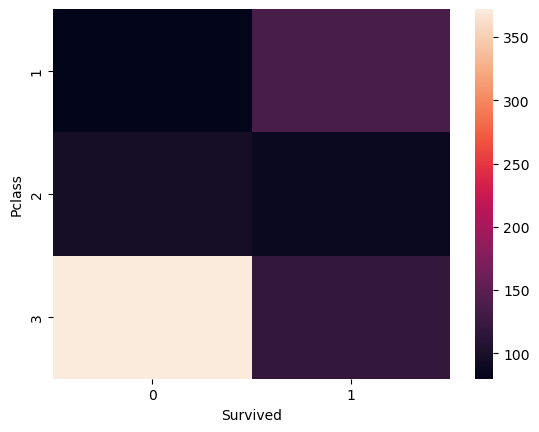

In [57]:
# ploting this in color graph 
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']))

In [61]:
# %of male and passengerClass survived 
titanic.groupby('Pclass').mean()['Survived']*100

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/4137232378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Pclass').mean()['Survived']*100


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [62]:
# %of male and female survived 
titanic.groupby('Sex').mean()['Survived']*100

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3837724008.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Sex').mean()['Survived']*100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [65]:
# %of 
titanic.groupby('Embarked').mean()['Survived']*100

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/1184324873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Embarked').mean()['Survived']*100


Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/528634529.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (titanic.groupby('Pclass').mean()['Survived']*100).plot(kind='bar')


<Axes: xlabel='Pclass'>

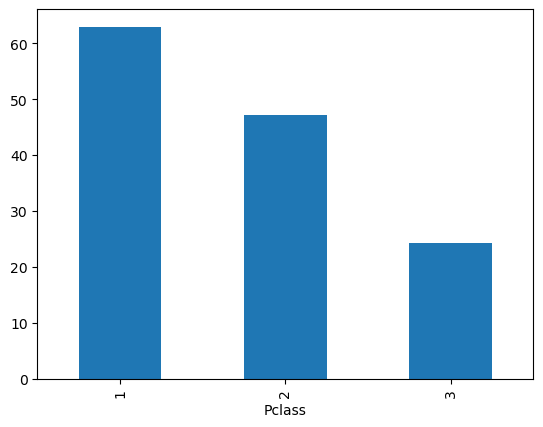

In [56]:
# plotting this in bar graph
(titanic.groupby('Pclass').mean()['Survived']*100).plot(kind='bar')

In [92]:
flights.pivot_table(values='passengers', index='month', columns='year')
# In such kind of table you can more understand the patters in cluster map or heatmap  

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

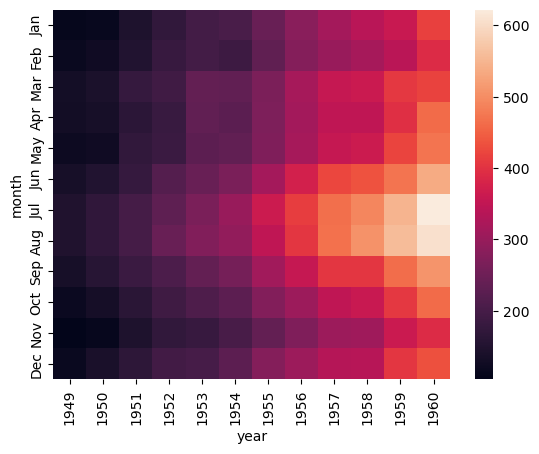

In [93]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))

### f. Cluster Map (Categorical - Categorical)

In [69]:
pd.crosstab(titanic['SibSp'], titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


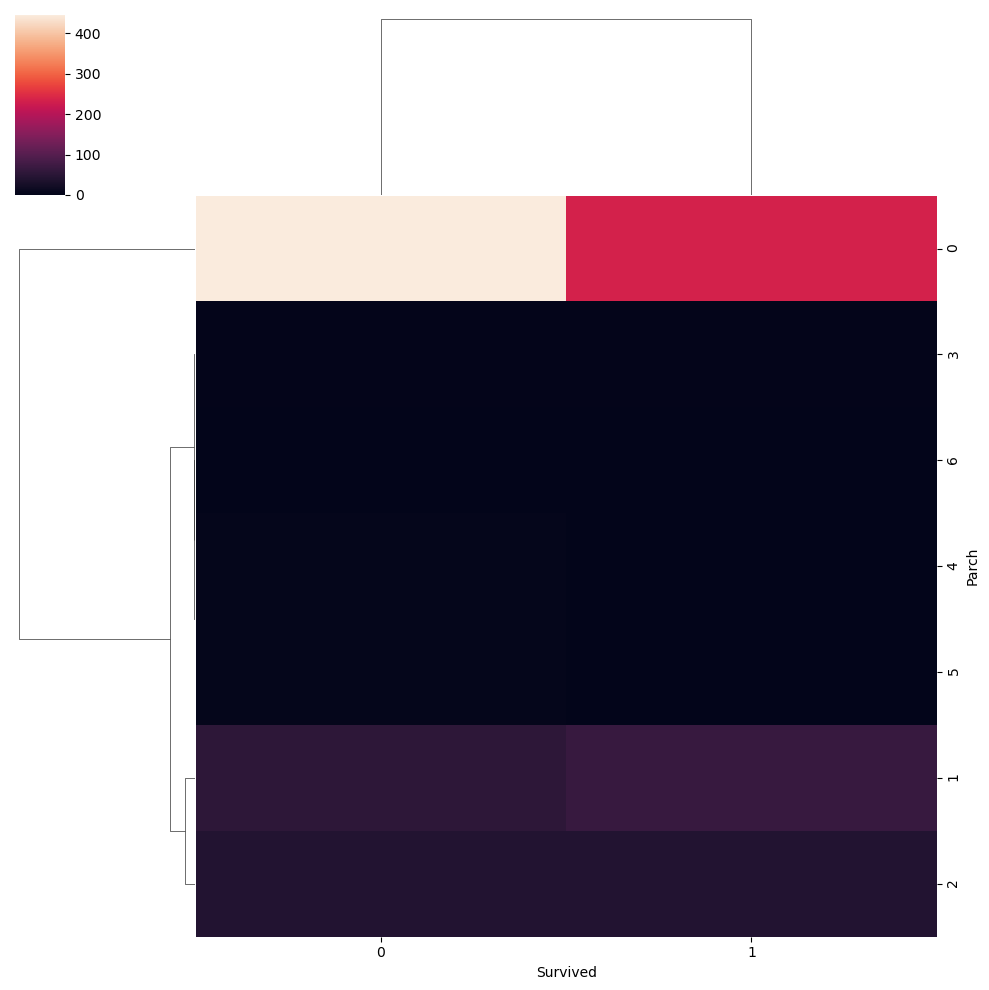

In [71]:
# cluster map relation b/w parentChild and Survived
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))

In [90]:
flights.pivot_table(values='passengers', index='month', columns='year')
# In such kind of table you can more understand the patters in cluster map or heatmap  

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


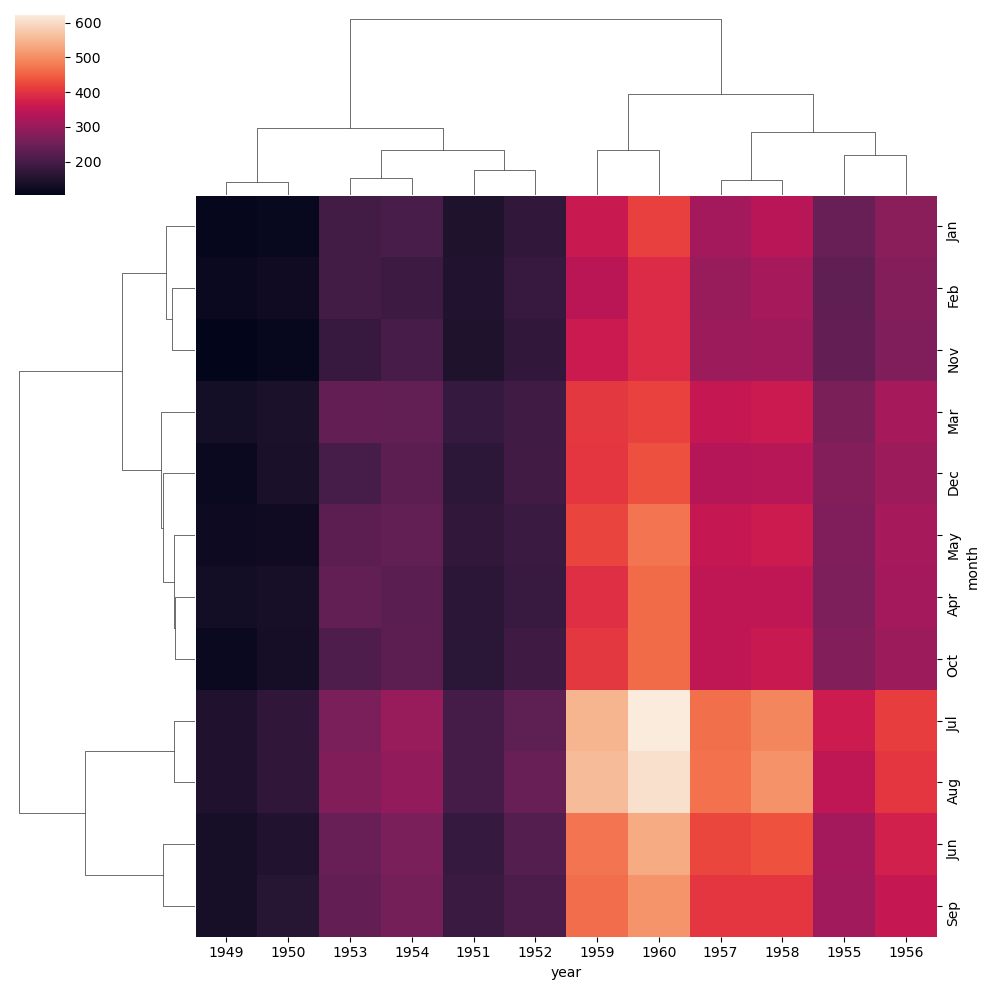

In [91]:
sns.clustermap(flights.pivot_table(values='passengers', index='month', columns='year'))

### g. PairPlot
      its used if we have a lot numerical quantites to find the corelation 

In [72]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.3,2.3,4.4,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
112,6.8,3.0,5.5,2.1,virginica
118,7.7,2.6,6.9,2.3,virginica
25,5.0,3.0,1.6,0.2,setosa


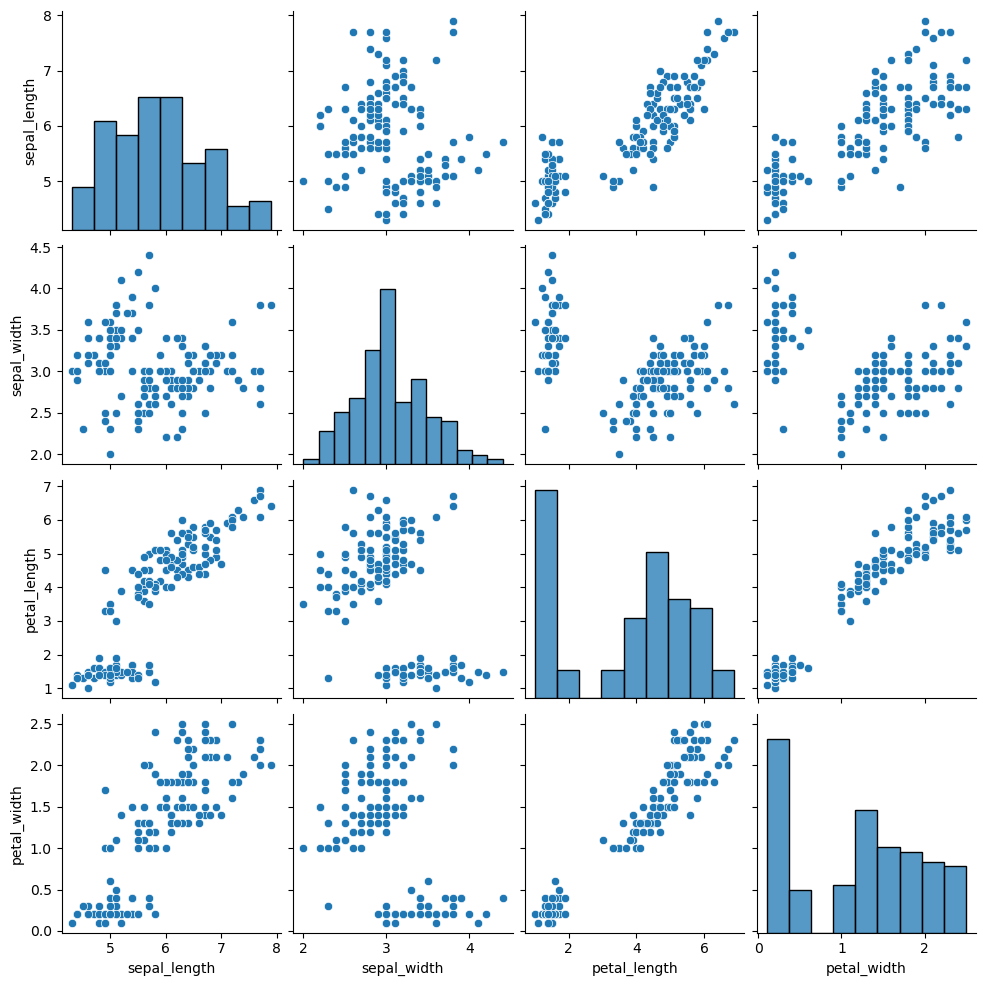

In [74]:
sns.pairplot(iris)

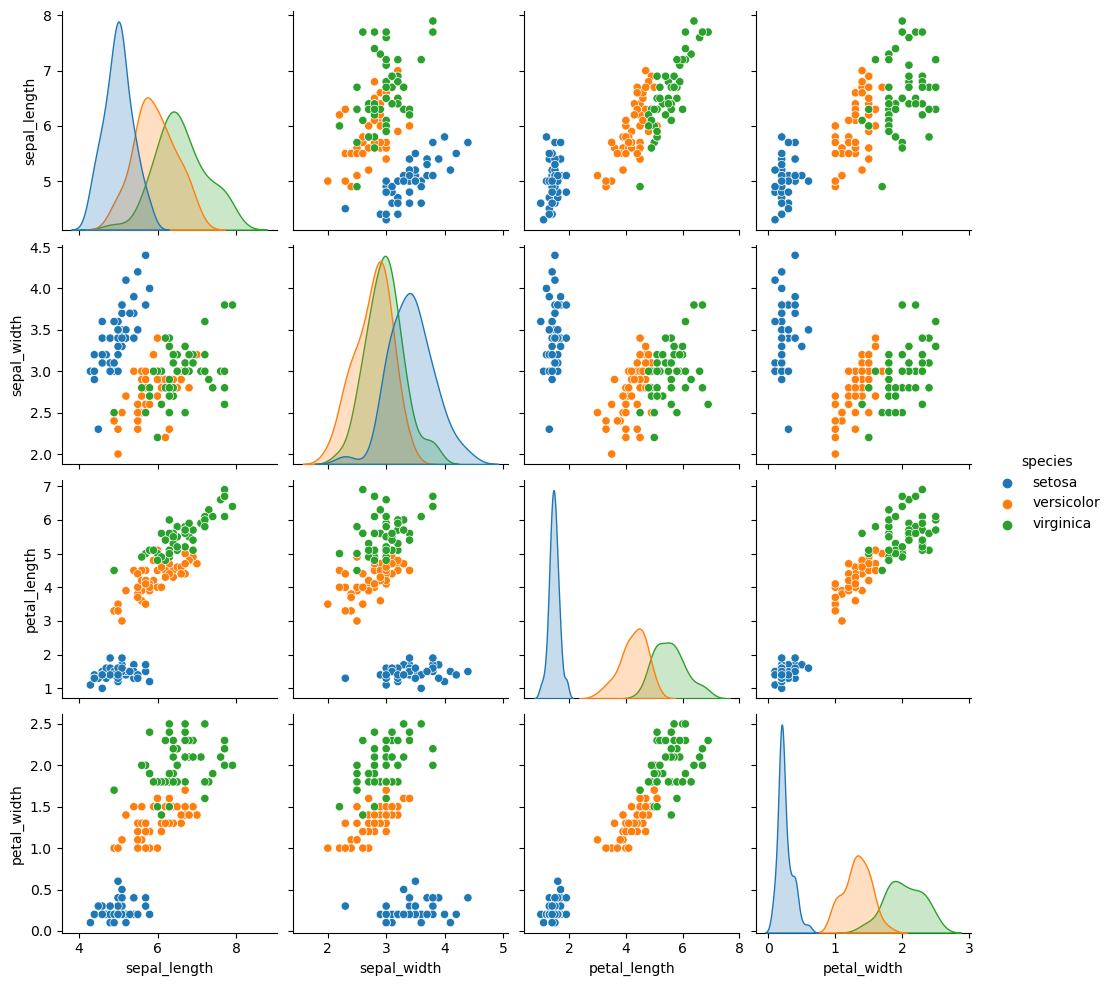

In [77]:
sns.pairplot(iris, hue='species')

### h. LinePlot (Numerical - Numerical)

In [78]:
flights.sample(5)

,year,month,passengers
55,1953,Aug,272
47,1952,Dec,194
138,1960,Jul,622
120,1959,Jan,360
22,1950,Nov,114


In [79]:
flights.groupby('year').sum().reset_index()

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/3899017891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby('year').sum().reset_index()


,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [80]:
# let the above line code called new
new = flights.groupby('year').sum().reset_index()

/var/folders/_d/kkj4npcs7fs5j848kl2rb82m0000gn/T/ipykernel_21076/100146689.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = flights.groupby('year').sum().reset_index()


<Axes: xlabel='year', ylabel='passengers'>

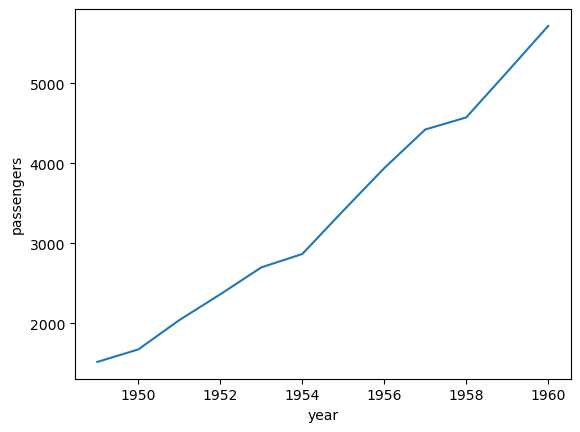

In [83]:
sns.lineplot(x=new['year'], y=new['passengers'])